<a href="https://colab.research.google.com/github/jjyoon1106/code-0/blob/main/PCA_2020116957.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

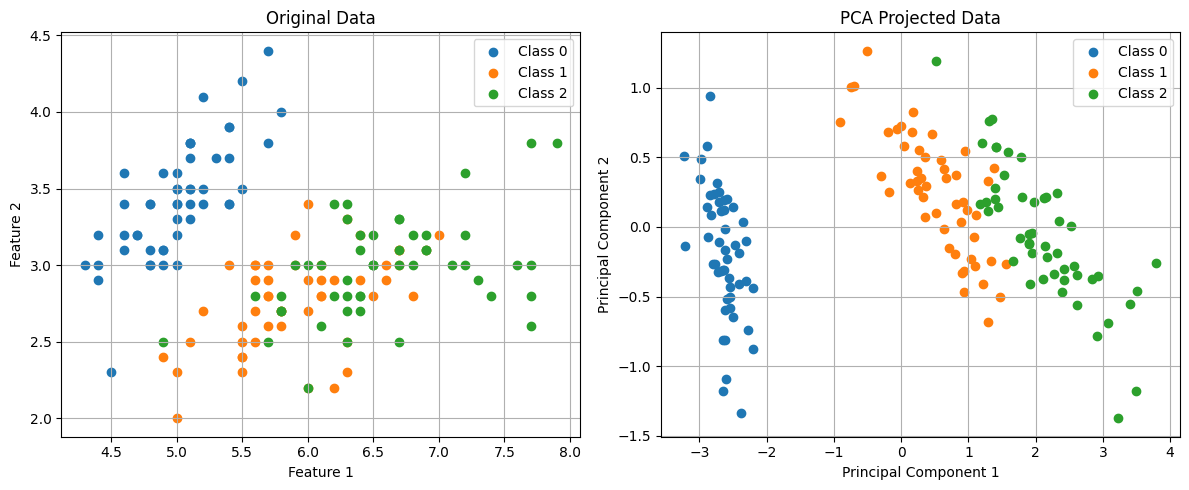

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 1. PCA with SVD
def pca_svd(data, n_components=2):

    # TODO 1: 평균 중심화
    data_centered = data - np.mean(data, axis=0)
    # Hint: np.mean() 사용

    # TODO 2: SVD 분해
    U, S, Vt = np.linalg.svd(data_centered, full_matrices=False)
    # Hint: np.linalg.svd() 사용

    # TODO 3: 상위 주성분 축으로 투영
    projected_data = np.dot(data_centered, Vt[:n_components].T)
    # Hint: np.dot() 사용

    return projected_data, S, Vt    # S, Vt는 SVD의 결과값들

# 실행
iris = load_iris()
data = iris.data
labels = iris.target

projected_data_svd, S, Vt = pca_svd(data, n_components=2)

plt.figure(figsize=(12, 5))
# (1) 원본 데이터의 첫 두 feature로 시각화
plt.subplot(1, 2, 1)
for class_idx in np.unique(labels):
    plt.scatter(data[labels == class_idx, 0], data[labels == class_idx, 1], label=f"Class {class_idx}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data")
plt.legend()
plt.grid(True)

# (2) PCA 결과 시각화
plt.subplot(1, 2, 2)
for class_idx in np.unique(labels):
    plt.scatter(projected_data_svd[labels == class_idx, 0], projected_data_svd[labels == class_idx, 1], label=f"Class {class_idx}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projected Data")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
